In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from scipy.spatial.distance import minkowski, cityblock

from sklearn.preprocessing import StandardScaler

## Zadanie 1
    
Wczytaj dane z pliku **PersonalData.csv**.
    
Oblicz odległość euklidesową \(d(A, B)\) między dwoma wybranymi rekordami \(A\) i \(B\).
    
Zmodyfikuj skalę dla atrybutu **zarobki** (przeskaluj jednostki z tysięcy na złote) i ponownie oblicz odległość euklidesową. Jak zmiana skali wpływa na wynik?
    
Aby wyeliminować wpływ skali, podziel wartość każdego atrybutu przez jego odchylenie standardowe. Oblicz ponownie odległość euklidesową dla przeskalowanych danych.
    
Dla punktów \(A\) i \(B\) oblicz także odległość Minkowskiego oraz odległość miejską (Manhattan).

In [86]:
df = pd.read_csv("PersonalData.csv")
print(df.head())

  Unnamed: 0  Wzrost (cm)  Waga (kg)  Staz (lata)  Zarobki (tys.)  \
0          A          190         88            3             3.5   
1          B          172         70           12             4.3   

   Ocena (pkt.)  Piętro  Dzieci  Odleglosc (km) Ubezp.  
0             7       6       1              25    Tak  
1             5       1       4              12    Nie  


In [87]:
A = df.iloc[0, 1:9]
B = df.iloc[1, 1:9]
A = A.to_numpy()
B = B.to_numpy()

odl = np.linalg.norm(A-B)
print(odl)

A[3] = A[3]*1000
B[3] = B[3]*1000
odl = np.linalg.norm(A-B)
print(odl)

df.iloc[:, 4] = df.iloc[:, 4] * 1000
std = df.iloc[:, 1:9].std(axis=0, ddof=1)
std = std.to_numpy()

A = A/std
B = B/std
odl = np.linalg.norm(A-B)
print(odl)

print(minkowski(A, B, 2))
print(minkowski(A, B, 1))
print(cityblock(A, B))

30.604574821421714
800.5847862656397
4.0
4.0
11.313708498984763
11.313708498984763


## Zadanie 2

Masz opisy trzech filmów
- `film1 = "kosmiczna stacja astronauta planeta obca"`
- `film2 = "astronauta rakieta księżyc misja kosmiczna"`
- `film3 = "wampir zamek noc krew mroczny"`

a. Stwórz reprezentację wektorową dla każdego filmu używając CountVectorizer

b. Oblicz podobieństwo cosinusowe między wszystkimi parami filmów

c. Które dwa filmy są najbardziej podobne? Które najmniej?

d . Dodaj czwarty film i sprawdź do którego jest najbardziej podobny:
    `film4 = "rakieta mars astronauta czerwona planeta"`

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

film1 = "kosmiczna stacja astronauta planeta obca"
film2 = "astronauta rakieta księżyc misja kosmiczna"
film3 = "wampir zamek noc krew mroczny"

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform([film1, film2, film3]).toarray()
print(vectorizer.get_feature_names_out())
print(vectors)

f1 = vectors[0]
f2 = vectors[1]
f3 = vectors[2]

print(f1)
print(f2)
print(f3)

dot12 = np.dot(f1, f2)
dot13 = np.dot(f1, f3)
dot23 = np.dot(f2, f3)

norm1 = np.linalg.norm(f1)
norm2 = np.linalg.norm(f2)
norm3 = np.linalg.norm(f3)

sim12 = dot12/(norm1*norm2)
sim13 = dot13/(norm1*norm3)
sim23 = dot23/(norm2*norm3)

print(sim12)
print(sim13)
print(sim23)

film4 = "rakieta mars astronauta czerwona planeta"
v4 = vectorizer.transform([film4]).toarray()
print(v4)
dot14 = np.dot(f1, v4[0])
dot24 = np.dot(f2, v4[0])
dot34 = np.dot(f3, v4[0])

norm4 = np.linalg.norm(v4[0])

sim14 = dot14/(norm1*norm4)
sim24 = dot24/(norm2*norm4)
sim34 = dot34/(norm3*norm4)

print(sim14)
print(sim24)
print(sim34)

['astronauta' 'kosmiczna' 'krew' 'księżyc' 'misja' 'mroczny' 'noc' 'obca'
 'planeta' 'rakieta' 'stacja' 'wampir' 'zamek']
[[1 1 0 0 0 0 0 1 1 0 1 0 0]
 [1 1 0 1 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 1 1 0 0 0 0 1 1]]
[1 1 0 0 0 0 0 1 1 0 1 0 0]
[1 1 0 1 1 0 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 0 0 0 0 1 1]
0.3999999999999999
0.0
0.0
[[1 0 0 0 0 0 0 0 1 1 0 0 0]]
0.5163977794943222
0.5163977794943222
0.0


## Zadanie 3

1. Załaduj zbiór danych **iris**.
Opis zbioru: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
2. Narysuj wykres rozrzutu dla współrzędnych **sepal_length** i **sepal_width**. Oznacz różnymi
kolorami i marklami różne klasy kwiatów.
3. Znajdź wartości **minimalne, maksymalne** oraz **średnie odchylenie kwadratowe** dla atrybutów zbioru.
4. Policz **współczynniki korelacji** między atrybutami.
5. Zastosuj **algorytm k-średnich** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.
6. Zastosuj **algorytm hierarchiczny aglomeracyjny** i znajdź podział na klastry dla współrzędnych **sepal_length** i **sepal_width**.

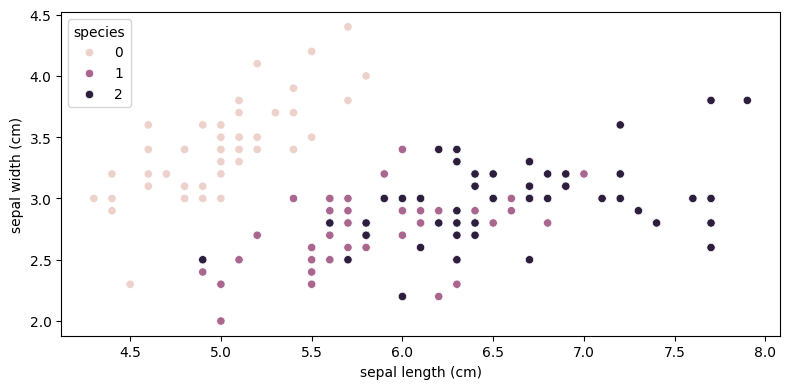

Minima
sepal length (cm)    4.3
sepal width (cm)     2.0
petal length (cm)    1.0
petal width (cm)     0.1
species              0.0
dtype: float64
Maxima
sepal length (cm)    7.9
sepal width (cm)     4.4
petal length (cm)    6.9
petal width (cm)     2.5
species              2.0
dtype: float64
Odchylenie
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
species              0.819232
dtype: float64
Współczynniki korelacji
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
species                     0.782561         -0.426658           0.949035   

                   petal width (cm)   speci

/tmp/ipython-input-4026136225.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dane['cluster'] = kmeans.labels_


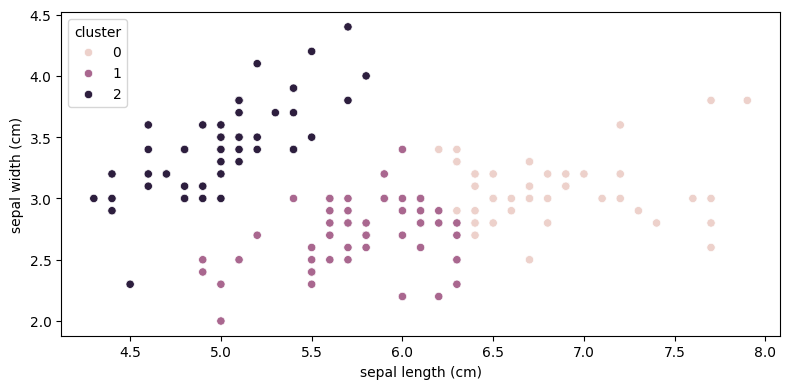

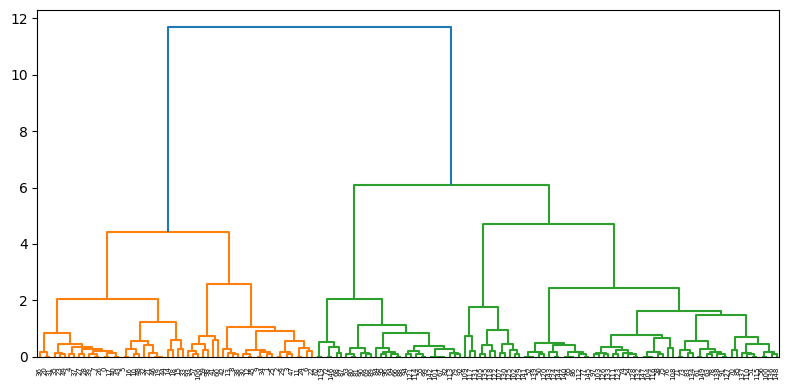

In [89]:
# Wczytanie zbioru danych Iris
iris = datasets.load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

fig, ax = plt.subplots(figsize=(8,4))
ax = sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.tight_layout()
plt.show()

print("Minima")
print(iris_df.min())
print("Maxima")
print(iris_df.max())
print("Odchylenie")
print(iris_df.std(ddof=1))

print("Współczynniki korelacji")
print(iris_df.corr())

dane = iris_df[['sepal length (cm)', 'sepal width (cm)']]
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dane)
dane['cluster'] = kmeans.labels_
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.scatterplot(data=dane, x='sepal length (cm)', y='sepal width (cm)', hue='cluster')
plt.tight_layout()
plt.show()

dane2 = iris_df[['sepal length (cm)', 'sepal width (cm)']]
Z = linkage(dane2, method='ward')
fig, ax = plt.subplots(figsize=(8,4))
dendrogram(Z)
plt.tight_layout()
plt.show()


## Zadanie 4
Dla danych z pliku penguins.csv wykonaj polecenia

Wyświetl podstawowe informacje o zbiorze.
1. Sprawdź czy w zbiorze nie brakuje danych. Jeżeli są – usuń je ().
2. Ogranicz się do atrybutów **bill_length_mm** i **flipper_length_mm**.
3. Narysuj dendogram, zinterpretuj go i wyznacz ilość klastrów.
4. Zastosuj algorytm hierarchiczny aglomeracyjny do zbioru i wyznacz klastry.
5. Stwórz wykres rozrzutu z zaznaczonymi klastrami.

W **punktach 3-5** przetestuj różne sposoby obliczenia odległości między klastrami (linkage-complete, average, single, ward).

Dane z https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
   bill_length_mm  flipper_length_mm
0            

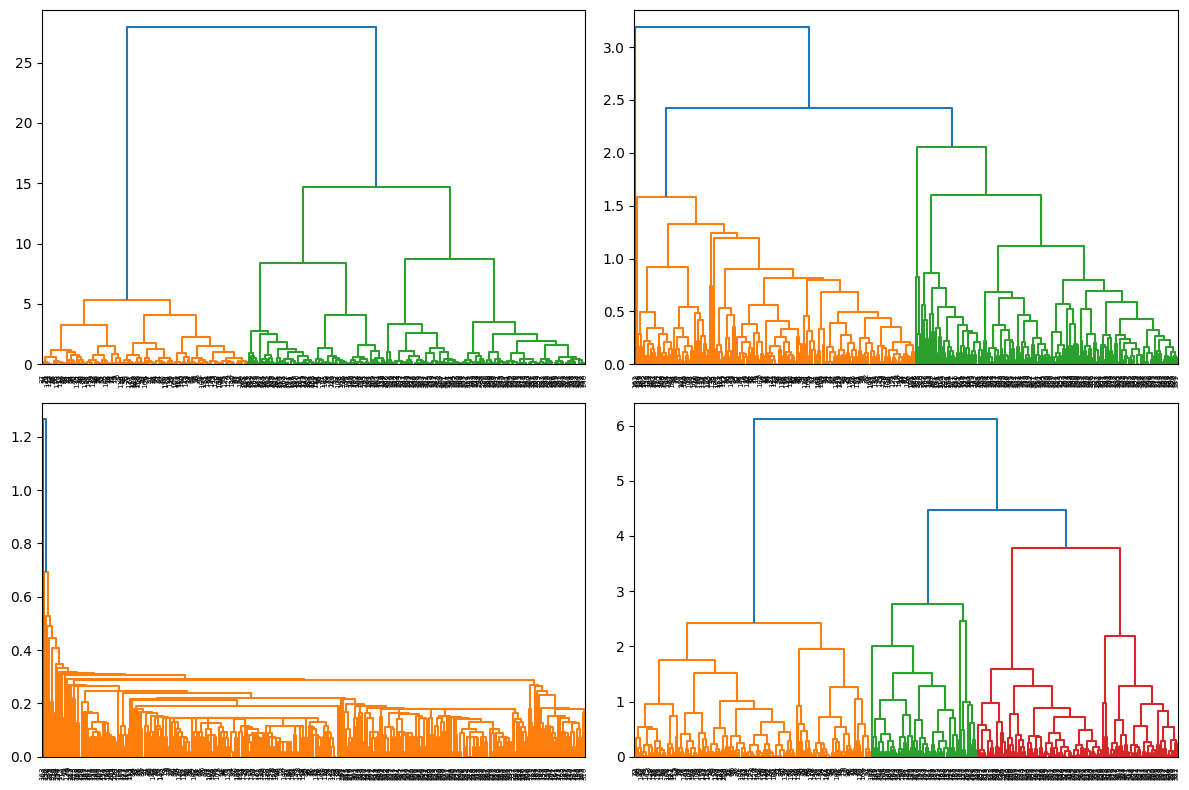

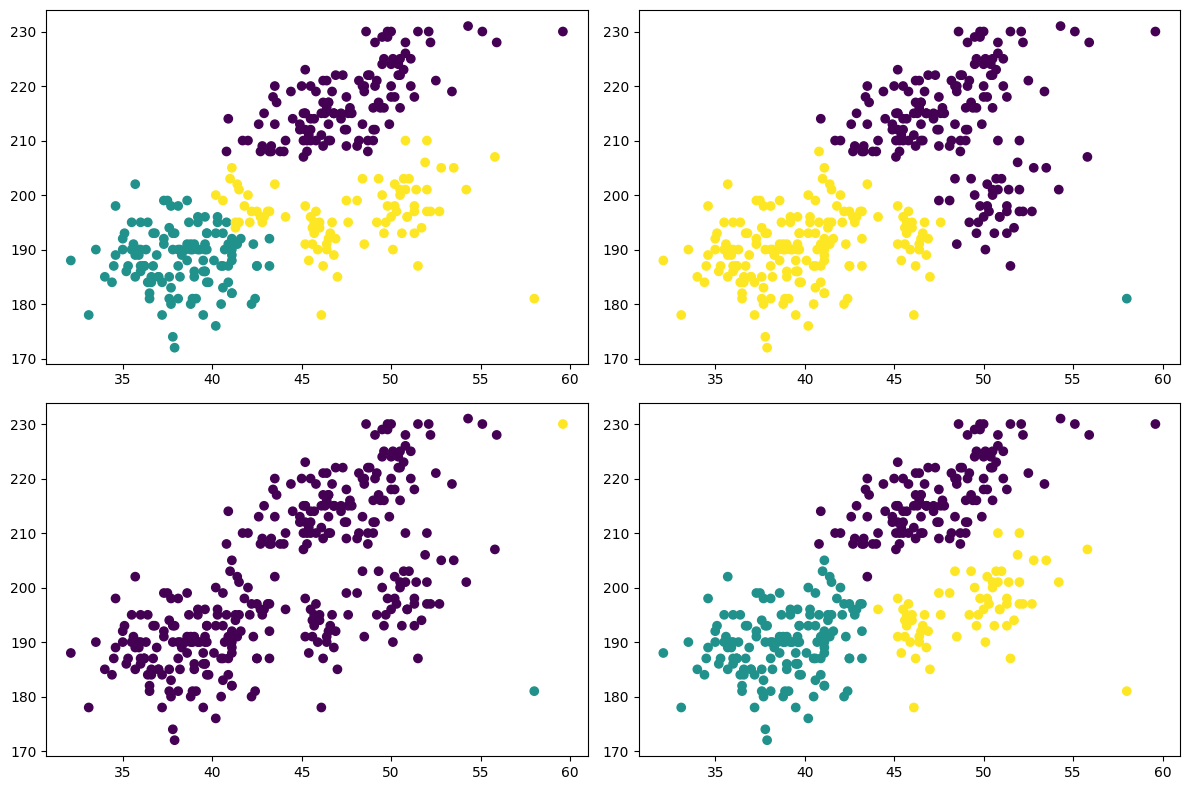

In [90]:
df = pd.read_csv("penguins.csv")
print(df.head())

print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())

dane = df[['bill_length_mm','flipper_length_mm']]
print(dane.head())

scaler = StandardScaler()
dane_s = scaler.fit_transform(dane)

plt.figure(figsize=(12,8))

Z = linkage(dane_s, method='ward')
plt.subplot(2,2,1)
dendrogram(Z)

Z = linkage(dane_s, method='average')
plt.subplot(2,2,2)
dendrogram(Z)

Z = linkage(dane_s, method='single')
plt.subplot(2,2,3)
dendrogram(Z)

Z = linkage(dane_s, method='complete')
plt.subplot(2,2,4)
dendrogram(Z)

plt.tight_layout()
plt.show()

model_w = AgglomerativeClustering(n_clusters=3, linkage='ward')
model_a = AgglomerativeClustering(n_clusters=3, linkage='average')
model_s = AgglomerativeClustering(n_clusters=3, linkage='single')
model_c = AgglomerativeClustering(n_clusters=3, linkage='complete')

label_w = model_w.fit_predict(dane_s)
label_a = model_a.fit_predict(dane_s)
label_s = model_s.fit_predict(dane_s)
label_c = model_c.fit_predict(dane_s)

fig, axes = plt.subplots(2,2,figsize=(12, 8))
axes[0,0].scatter(df['bill_length_mm'], df['flipper_length_mm'], c=label_w, cmap='viridis')
axes[0,1].scatter(df['bill_length_mm'], df['flipper_length_mm'], c=label_a, cmap='viridis')
axes[1,0].scatter(df['bill_length_mm'], df['flipper_length_mm'], c=label_s, cmap='viridis')
axes[1,1].scatter(df['bill_length_mm'], df['flipper_length_mm'], c=label_c, cmap='viridis')
plt.tight_layout()
plt.show()

In [91]:
df = pd.read_csv("PersonalData.csv", index_col=0, delimiter=",")

In [92]:
df

,Wzrost (cm),Waga (kg),Staz (lata),Zarobki (tys.),Ocena (pkt.),Piętro,Dzieci,Odleglosc (km),Ubezp.
A,190,88,3,3.5,7,6,1,25,Tak
B,172,70,12,4.3,5,1,4,12,Nie


In [93]:
df.loc['A']

,A
Wzrost (cm),190
Waga (kg),88
Staz (lata),3
Zarobki (tys.),3.5
Ocena (pkt.),7
Piętro,6
Dzieci,1
Odleglosc (km),25
Ubezp.,Tak
